Here is first step to convert review file to csv (example for one file)





In [ ]:
import csv
import re
import requests

# Specify the input and output file paths
input_url = 'https://github.com/Vovanch0/sentiment-analysis-isy503/raw/main/data/dvd_positive.review'
output_file = 'dvd_positive.csv'

# Download the content of the .review file from the URL
response = requests.get(input_url)
data = response.text


# Split the data into individual reviews
reviews = re.findall(r'<review>(.*?)</review>', data, re.DOTALL)

# Prepare the CSV file headers
headers = [
    'unique_id', 'asin', 'product_name', 'product_type', 'helpful',
    'rating', 'title', 'date', 'reviewer', 'reviewer_location', 'review_text'
]


# Open a CSV file for writing
with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=headers)
    writer.writeheader()

    # Iterate through each review and extract the fields
    for review in reviews:
        review_dict = {}
        for header in headers:
            pattern = f'<{header}>(.*?)</{header}>'
            match = re.search(pattern, review, re.DOTALL)
            review_dict[header] = match.group(1).strip() if match else ''

        # Write the row to the CSV
        writer.writerow(review_dict)

print(f"CSV file '{output_file}' created successfully.")

CSV file 'dvdpos.csv' created successfully.


Local save from virtual Google colab fs

In [ ]:
from google.colab import files
files.download('dvd_positive.csv')

Merge all csv file to one csv

In [ ]:
import os
import pandas as pd

def merge_csv_files(folder_path, output_file):
    # List to hold all the dataframes
    all_dataframes = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            csv_file = os.path.join(folder_path, filename)
            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_file)
            all_dataframes.append(df)

    # Concatenate all DataFrames
    merged_df = pd.concat(all_dataframes, ignore_index=True)

    # Write the merged DataFrame to a new CSV file
    merged_df.to_csv(output_file, index=False)

folder_path = "C:/503/final"  # Replace with your folder path
output_file = "C:/503/final/merged_output.csv"    # Name of the output file

merge_csv_files(folder_path, output_file)

After that, I have uploaded this file to github.

Link
https://github.com/Vovanch0/sentiment-analysis-isy503/raw/main/data/merged_output.csv


In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import plotly.express as px

import pandas as pd
data = pd.read_csv('https://github.com/Vovanch0/sentiment-analysis-isy503/raw/main/data/merged_output.csv',
                   sep=',', encoding='utf8')



In [ ]:
print('Number of reviews', str(len(data)))

Number of reviews 8000


In [ ]:
data.head(15)

Encoding the words

Encode the labels for ‘positive’ and ‘negative’

In [ ]:
# Create a new column called 'type'.
# If the rating is greater than 3, then the type of review is positive (1),
# otherwise it is negative (0)
data['type'] = np.where(data['rating'] > 3, 1, 0)

# Delete the unnecessary columns
data.drop(['unique_id', 'asin', 'product_name', 'product_type', 'helpful',
           'date', 'reviewer', 'reviewer_location'], axis=1, inplace=True)

# Show the number of positive and negative reviews
type_review = data['type'].value_counts()
print("Number of positive reviews:", type_review[1])
print("Number of negative reviews:", type_review[0])

Number of positive reviews: 4000
Number of negative reviews: 4000


In [ ]:
data.head(15)

,rating,title,review_text,type
0,1.0,"Horrible book, horrible.","THis book was horrible. If it was possible to rate it lower than one star i would have. I am an avid reader and picked this book up after my mom had gotten it from a friend. I read half of it, suffering from a headache the entire time, and the...",0
1,1.0,shallow self-indulgence,"I like to use the Amazon reviews when purchasing books, especially alert for dissenting perceptions about higly rated items, which usually disuades me from a selection. So I offer this review that seriously questions the popularity of this work ...",0
2,1.0,"Horrible book, horrible.","THis book was horrible. If it was possible to rate it lower than one star i would have. I am an avid reader and picked this book up after my mom had gotten it from a friend. I read half of it, suffering from a headache the entire time, and the...",0
3,1.0,Disappointment,"I'm not sure who's writing these reviews, but I read repitition after repitition after repitition, with a lot of confusing fluff. Asking hard questions to solve complex or simple issues. What's ""fierce"" about that? \n\nThe writing style and conte...",0
4,2.0,A Disappointing Mess,"I picked up the first book in this series (The Eyre Affair) based purely on its premise and was left somewhat underwhelmed. Still, the potential for the series seemed so large that I went ahead and read this second one too, only to be even less e...",0
5,2.0,"Save your money, there are better books out there","Not only do I disagree with his opinions, but some of his facts are blatently false. On page 106 he refers to violence agains Native Americans by European settlers as ""isolated instances"" and not planned nor calculated. Had to read it for a cla...",0
6,1.0,"Thank you, but no, thanks","&quot;I have received your new book against the human race, and thank you for it. Never was such cleverness used in the design of making us all stupid. One longs, in reading your book, to walk on all fours. But as I have lost that habit for more ...",0
7,1.0,Unendurable,"This book was on somebody's Amazon.com LISTMANIA for Sea Turtles, so I hunted it down. It is only vaguely about sea turtles, in that it is set on an island in Georgia where sea turtles nest. There is a sea turtle biologist introduced at the ver...",0
8,1.0,The Hard Way,"I am not sure whatever possessed me to buy this book. Honestly, it was a complete waste of my time. To quote a friend, it was not the best use of my entertainment dollar. If you are a fan of pedestrian writing, lack-luster plots and hackneyed ...",0
9,2.0,Some good info among the political commercial,"When Professor Polk describes the sweep of history in Iraq, he is at his best, but the book often descends into a political diatribe that is neither appropriate nor grounded in the facts. Much of the political ranting is supposition, marring wha...",0


Let's see unique values in the 'rating'

In [ ]:
data['rating'].unique()

array([1., 2., 5., 4.])

**Clean data | Speller**


1 Initialize the autocorrect object for English

2 Apply the autocorrect function to each row in the review_text column, and stores the result in a new column review_text_correct.

3 Save the cleaned data to a new CSV file cleaned_reviews.csv

Proccessing time - around 55 minutes!!!

In [ ]:
!pip install autocorrect
from autocorrect import Speller

# Set language to Eng
spell = Speller(lang='en')

# Apply autocorrect
data['review_text_correct'] = data['review_text'].apply(spell)

# Save the cleaned data to a CSV file
output_file = 'cleaned_reviews.csv'
data.to_csv(output_file, index=False, encoding='utf-8')

print(f"Cleaned data saved to '{output_file}'")

Cleaned data saved to 'cleaned_reviews.csv'


In [ ]:
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

As the processing time is too long, so I uploaded this processed file to Github

In [3]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import plotly.express as px

import pandas as pd
data = pd.read_csv('https://github.com/Vovanch0/sentiment-analysis-isy503/raw/main/model/import-data/cleaned_reviews.csv')

data.head(3)

,rating,title,review_text,type,review_text_correct
0,1.0,"Horrible book, horrible.",THis book was horrible. If it was possible to...,0,This book was horrible. If it was possible to...
1,1.0,shallow self-indulgence,I like to use the Amazon reviews when purchasi...,0,I like to use the Amazon reviews when purchasi...
2,1.0,"Horrible book, horrible.",THis book was horrible. If it was possible to...,0,This book was horrible. If it was possible to...


In [4]:
# Show a box plot of the review length

# Calculate the review length
data['review_length'] = data['review_text_correct'].str.split().apply(len)
fig = px.box(data['review_length'])
fig.show()

In [ ]:
data['review_length'] = data['review_text_correct'].str.split().apply(len)
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = data['review_length'].quantile(0.25) # q1 = 49
q3 = data['review_length'].quantile(0.75) # q3 = 161
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Define the upper and lower fences for outlier detection
upper_fence_iqr = q3 + 1.5 * iqr # upper_fence_iqr = 329
lower_fence_iqr = q1 - 1.5 * iqr # lower_fence_iqr = -119
# Identify outliers based on the IQR method
outliers_iqr = data[(data['review_length'] > upper_fence_iqr) | (data['review_length'] < lower_fence_iqr)]
# Remove outliers
data_after_iqr_removal = data[~data.index.isin(outliers_iqr.index)]

# Evaluate Method 2 (IQR)
print("Outlier removal using Interquartile Range (IQR)")
print("Number of rows after IQR removal:", len(data_after_iqr_removal))
print("Number of rows removed:", len(outliers_iqr))
print()

Method 2: Outlier removal using Interquartile Range (IQR)
Number of rows after IQR removal: 7360
Number of rows removed: 640



Outlier removal to eliminate really short or wrong reviews using Median Absolute Deviation (MAD)
The Median Absolute Deviation (MAD) is a robust method for detecting outliers in data
 1. Calculate the Length of Each Reviews
 2. Calculate the Median and MAD
 3. Identify Outliers (a threshold (usually 2.5 or 3 times the MAD) to identify outliers)
 4. Filter Out Outliers


In [5]:


# Method 1: Outlier removal using Median Absolute Deviation (MAD)

# Calculate the median of review lengths
median_review_length = data['review_length'].median() # median = 90
# Calculate the Median Absolute Deviation (MAD)
mad = np.abs(data['review_length'] - median_review_length).median()
# Define a threshold for identifying outliers
threshold = 2.5  # can adjust this threshold based on needs

# Define the upper and lower fences for outlier detection
upper_fence_mad = median_review_length + threshold * mad
lower_fence_mad = median_review_length - threshold * mad
# Identify outliers based on the MAD method
outliers_mad = data[(data['review_length'] > upper_fence_mad) | (data['review_length'] < lower_fence_mad)]
# Remove outliers
data_after_mad_removal = data[~data.index.isin(outliers_mad.index)]

# Evaluate Method 1 (MAD)
print("Outlier removal using Median Absolute Deviation (MAD)")
print("Number of rows after MAD removal:", len(data_after_mad_removal))
print("Number of rows removed:", len(outliers_mad))
print()

Method 1: Outlier removal using Median Absolute Deviation (MAD)
Number of rows after MAD removal: 6857
Number of rows removed: 1143



Uses the NLTK library to perform sentiment analysis on text data, identifying and filtering out reviews with
nonsensical or spam-like reviews

If the threshold (compound) is too low (e.g., -0.9): Only a very small number of extremely negative reviews will be detected,
potentially missing less negative but still significant reviews.
If the threshold is too high (e.g., 0): More reviews will be detected, including those that may be only slightly negative,
increasing the number of false positives.

In [6]:
#Cleaning the data from punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Clean 'review_text_correct' column
data['review_text_correct'] = data['review_text_correct'].apply(remove_punctuation)

# Count the number of each type of review (positive/negative) remaining
total_reviews = data['type'].value_counts()

print('Total reviews: ', str(len(data)))
print(total_reviews)

Total reviews:  7853
type
1    3971
0    3882
Name: count, dtype: int64


In [7]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to detect anomalies based on sentiment analysis
def detect_anomalies(text):
    # Return True if the sentiment is significantly negative, else False
    return sia.polarity_scores(text)['compound'] < -0.5

# Filter out reviews identified as anomalies
filtered_data_nlp = data[~data['review_text_correct'].apply(detect_anomalies)]

# Evaluate the effectiveness of NLP-based anomaly detection
num_removed_reviews = len(data) - len(filtered_data_nlp)
print("NLTK NLP-based Anomaly Detection")
print(f"Number of reviews before filtering: {len(data)}")
print(f"Number of reviews after filtering: {len(filtered_data_nlp)}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


NLP-based Anomaly Detection
Number of reviews before filtering: 7853
Number of reviews after filtering: 6530


In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
# Splitting the data
# Training data is 60%, Validation data is 20%, Test data is 20%

# Split the data into training (60%) and remaining data (40%)
train_data, remaining_data = train_test_split(data, test_size=0.4, random_state=42)
# Split the remaining data into validation (50%) and test data (50%)
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)
# Print the sizes of the resulting datasets
print("Training data size:", len(train_data))
print("Validation data size:", len(val_data))
print("Test data size:", len(test_data))

Training data size: 4711
Validation data size: 1571
Test data size: 1571


Model based on pretrained 'distilroberta-base' model

In [9]:
import torch
import torch.nn as nn
!pip install transformers
from transformers import RobertaModel, AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the RoBERTa model class
class VSmegaClassifier(nn.Module):
    def __init__(self):
        super(VSmegaClassifier, self).__init__()
        self.roberta = AutoModelForSequenceClassification.from_pretrained('distilroberta-base')

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.logits

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        review = self.data.iloc[idx]['review_text_correct']
        label = self.data.iloc[idx]['type']
        encoding = self.tokenizer(review, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.float)
        }

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('roberta-base')
model = VSmegaClassifier()
# Move the model to the device
model.to(device)

# Define training parameters
batch_size = 24
epochs = 8
learning_rate = 2e-5
max_length = 256

# Splitting the data
# Training data is 60%, Validation data is 20%, Test data is 20%
train_data, remaining_data = train_test_split(data, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)


# Create datasets and data loaders
train_dataset = CustomDataset(train_data, tokenizer, max_length=max_length)
val_dataset = CustomDataset(val_data, tokenizer, max_length=max_length)
test_dataset = CustomDataset(test_data, tokenizer, max_length=max_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Define learning rate schedule and warm-up steps
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=total_steps//10, num_training_steps=total_steps)

# Training loop with gradient clipping and scheduler step
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        with torch.cuda.amp.autocast():  # Mixed Precision Training
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels.long())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        scheduler.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f'Training Loss: {epoch_loss:.4f}')

    # Validation loop
    model.eval()
    val_predictions = []
    val_labels = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f'Validation'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            predictions = torch.argmax(outputs, dim=1).flatten().cpu().numpy()
            val_predictions.extend(predictions)
            val_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_predictions)
    print(f'Validation Accuracy: {val_accuracy:.4f}')

# Test loop
model.eval()
test_predictions = []
test_labels = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc=f'Testing'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask)
        predictions = torch.argmax(outputs, dim=1).flatten().cpu().numpy()
        test_predictions.extend(predictions)
        test_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'\nTest Accuracy: {test_accuracy:.4f}')

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

Epoch 1/8: 100%|██████████| 197/197 [00:48<00:00,  4.03it/s]


Training Loss: 0.5106


Validation: 100%|██████████| 66/66 [00:12<00:00,  5.25it/s]


Validation Accuracy: 0.8848


Epoch 2/8: 100%|██████████| 197/197 [00:40<00:00,  4.90it/s]


Training Loss: 0.2522


Validation: 100%|██████████| 66/66 [00:13<00:00,  4.86it/s]


Validation Accuracy: 0.9236


Epoch 3/8: 100%|██████████| 197/197 [00:42<00:00,  4.64it/s]


Training Loss: 0.1676


Validation: 100%|██████████| 66/66 [00:13<00:00,  5.03it/s]


Validation Accuracy: 0.9185


Epoch 4/8: 100%|██████████| 197/197 [00:40<00:00,  4.86it/s]


Training Loss: 0.1083


Validation: 100%|██████████| 66/66 [00:13<00:00,  5.06it/s]


Validation Accuracy: 0.9173


Epoch 5/8: 100%|██████████| 197/197 [00:43<00:00,  4.55it/s]


Training Loss: 0.0753


Validation: 100%|██████████| 66/66 [00:12<00:00,  5.09it/s]


Validation Accuracy: 0.9204


Epoch 6/8: 100%|██████████| 197/197 [00:40<00:00,  4.86it/s]


Training Loss: 0.0432


Validation: 100%|██████████| 66/66 [00:14<00:00,  4.68it/s]


Validation Accuracy: 0.9211


Epoch 7/8: 100%|██████████| 197/197 [00:40<00:00,  4.86it/s]


Training Loss: 0.0271


Validation: 100%|██████████| 66/66 [00:12<00:00,  5.10it/s]


Validation Accuracy: 0.9217


Epoch 8/8: 100%|██████████| 197/197 [00:40<00:00,  4.87it/s]


Training Loss: 0.0194


Validation: 100%|██████████| 66/66 [00:13<00:00,  5.07it/s]


Validation Accuracy: 0.9230


Testing: 100%|██████████| 66/66 [00:13<00:00,  5.06it/s]


Test Accuracy: 0.9223


In [2]:
from huggingface_hub import login

login(token="your token")


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Test Accuracy: 0.9223


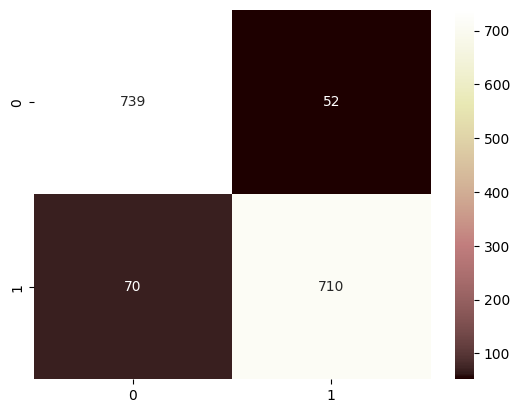

In [13]:
import seaborn as sb
# Show the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix as a heatmap
confusionMatrixPlot = sb.heatmap(conf_matrix, annot = True, fmt = 'g', cmap = 'pink')

In [14]:
# Save the fine-tuned model to the folder
model.roberta.save_pretrained('VSmegaClassifier')

# Save the tokenizer to the same folder
tokenizer.save_pretrained('VSmegaClassifier')

#import shutil
#from google.colab import files
#shutil.make_archive('VSmegaClassifier', 'zip', 'VSmegaClassifier')

#files.download('VSmegaClassifier.zip')

('VSmegaClassifier/tokenizer_config.json',
 'VSmegaClassifier/special_tokens_map.json',
 'VSmegaClassifier/vocab.json',
 'VSmegaClassifier/merges.txt',
 'VSmegaClassifier/added_tokens.json',
 'VSmegaClassifier/tokenizer.json')

In [15]:
from google.colab import drive
!mkdir -p /content/drive/MyDrive/VSmegaClassifier/

# save model and tokenizer to Google Drive
!cp -r VSmegaClassifier/* /content/drive/MyDrive/VSmegaClassifier/
